# <center> Anomaly Detection of DDoS Attacks using AI </center>

## I. Brief Intro
<br>
As part of my internship at YaneCode Digital, I'm working on a project takling anomaly detection in computer network where I focuse on Distributed Denial of Service (DDoS) attacks. Anomaly detection plays a crucial role in cybersecurity, aiming to identify unusual patterns and activities that deviate significantly from normal behavior within a network or system.
<br><br>
For this project, I am collecting network traffic data and logs from various sources. I then preprocess and transform the raw data to prepare it for analysis. Through exploratory data analysis, I gain insights into normal network behavior and identify potential features for distinguishing normal from anomalous traffic.

## II. Dataset

In this project, the challenge arose from the absence of recent datasets exclusively focused on DDoS attacks in the public domain. Instead, IDS datasets such as CSE-CIC-IDS2018-AWS,and Intrusion Detection Evaluation Dataset (CIC-IDS2017) were available. <br> <br>
 To enhance the dataset's variance, DDoS flows were extracted from different IDS datasets, each generated in distinct years using various experimental DDoS traffic generation tools. These extracted DDoS flows were then combined with "Benign" flows, which were separately extracted from the same base dataset. The result was a single, comprehensive dataset that includes both DDoS and normal network traffic, allowing for more diverse and accurate anomaly detection.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_15548\3641142027.py:6: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,External IP
0,192.168.10.16-199.244.48.55-41936-443-6,192.168.10.16,41936,199.244.48.55,443,6,7/7/2017 3:30,143347,47,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,NaN
1,192.168.10.16-54.210.195.63-42970-80-6,192.168.10.16,42970,54.210.195.63,80,6,7/7/2017 3:30,50905,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,NaN
2,192.168.10.16-199.244.48.55-41944-443-6,192.168.10.16,41944,199.244.48.55,443,6,7/7/2017 3:30,143899,46,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,NaN
3,192.168.10.3-192.168.10.17-53-12886-17,192.168.10.17,12886,192.168.10.3,53,17,7/7/2017 3:30,313,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,NaN
4,192.168.10.16-199.244.48.55-41942-443-6,192.168.10.16,41942,199.244.48.55,443,6,7/7/2017 3:30,142605,45,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,NaN


### Data Preprocessing

In [101]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 225745 rows and 86 columns


In [102]:
# We Strip any leading or trailing white spaces from column names
df.columns = df.columns.str.strip()

# we then drop empty rows
df.dropna(subset=['Label'], inplace=True)

In [103]:

# We Get unique values of the 'Label' column
unique_labels = df['Label'].unique()

# then we Print the unique values
print(unique_labels)

# we get value counts of each unique value in the 'Label' column
label_counts = df['Label'].value_counts()

# finally we print the value counts
print(label_counts)

['BENIGN' 'DDoS']
Label
BENIGN    183910
DDoS       41835
Name: count, dtype: int64


### Exploratory data analysis 

In [104]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 225745 rows and 86 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225745 non-null  object 
 1   Source IP                    225745 non-null  object 
 2   Source Port                  225745 non-null  int64  
 3   Destination IP               225745 non-null  object 
 4   Destination Port             225745 non-null  int64  
 5   Protocol                     225745 non-null  int64  
 6   Timestamp                    225745 non-null  object 
 7   Flow Duration                225745 non-null  int64  
 8   Total Fwd Packets            225745 non-null  int64  
 9   Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets  225745 non-null  int64  
 11  Total Length of Bwd Packets  225745 non-null  int64  
 12  Fwd Packet Length Max        225745 non-null  int64  
 13 

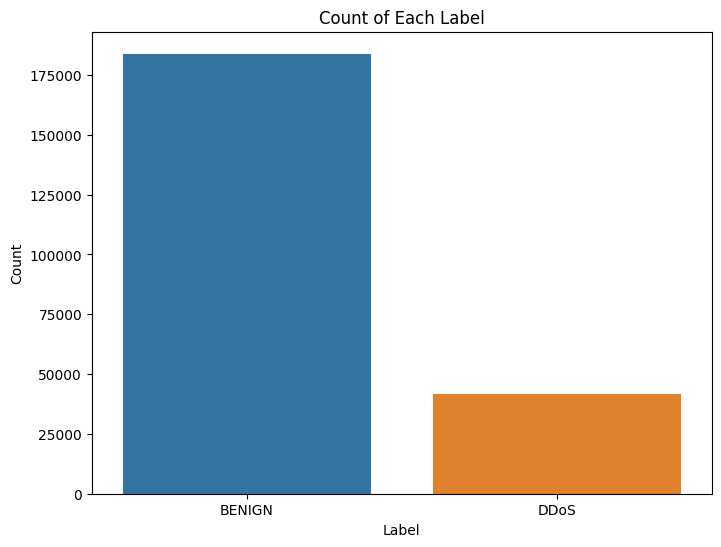

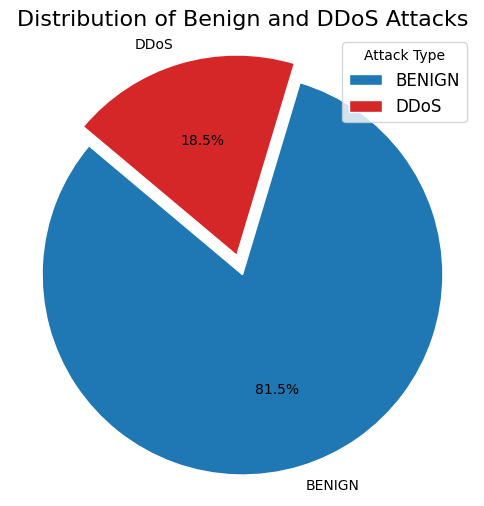

In [106]:

# Get a summary of the DataFrame
print(df.info())

# Show basic statistics of the numerical columns
print(df.describe())

# Check for missing values in the DataFrame
print(df.isnull().sum())

# Check the unique values in the 'Label' column
print(df['Label'].unique())

# Count the occurrences of each value in the 'Label' column
print(df['Label'].value_counts())


# Plot a count plot of categorical features (example: 'Label')
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Label')
plt.show()

# Create a pie chart
plt.figure(figsize=(6, 6))

# Define colors for the slices
colors = ['#1f77b4', '#d62728']

# Define the explode distance (separating the slices)
explode = (0.1, 0)

# Create the pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140, wedgeprops={'edgecolor': 'white'})

# Set a title and legend for the plot
plt.title('Distribution of Benign and DDoS Attacks', fontsize=16)
plt.legend(label_counts.index, title="Attack Type", loc="best", fontsize=12)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()




### Correlation Matrix

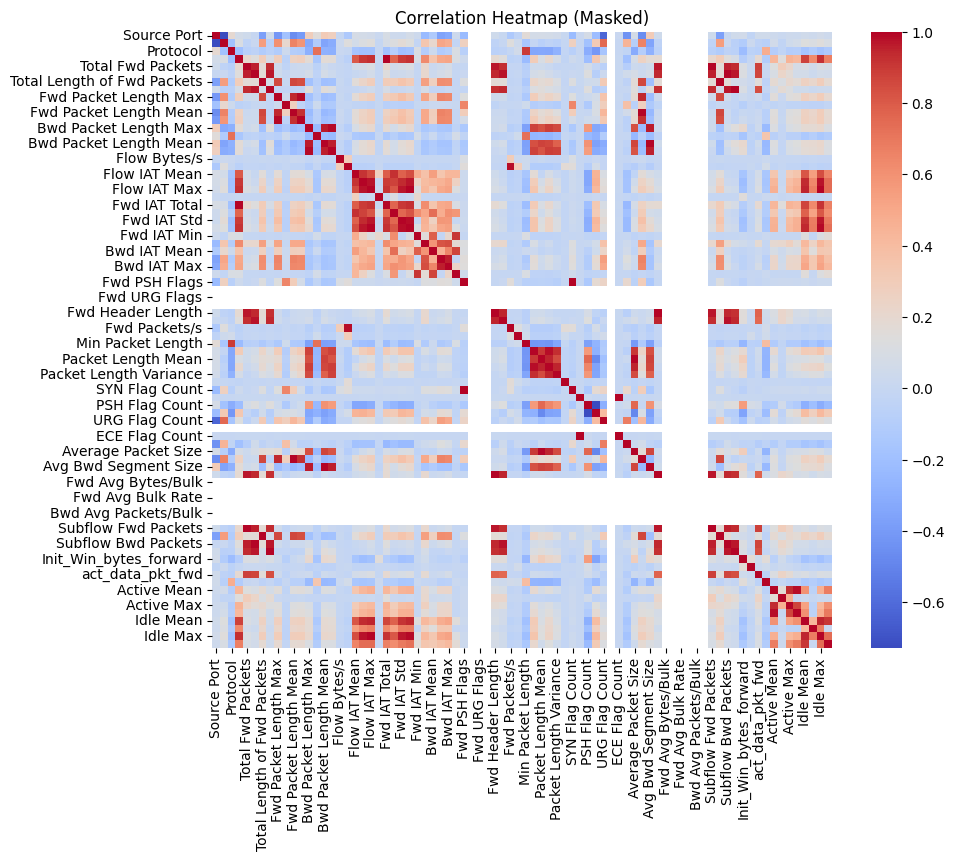

In [107]:
# Create a correlation matrix for numerical columns and visualize it using a heatmap

# Filter only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
# Assuming you have a DataFrame 'data' with numeric columns

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a correlation heatmap without showing numeric values
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap (Masked)')
plt.show()
